In [168]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

priority, window, num_nodes, ave_sum_stay_t, se_sum_stay_t, ave_sum_task_t, se_sum_task_t, ave_var_task_t, se_var_task_t = np.loadtxt("./data/exp/data_true", delimiter=',', unpack=True)
priority_f, window_f, num_nodes_f, ave_sum_stay_f, se_sum_stay_f, ave_sum_task_f, se_sum_task_f, ave_var_task_f, se_var_task_f = np.loadtxt("./data/exp/data_false", delimiter=',', unpack=True)
priority_g, window_g, num_nodes_g, ave_sum_stay_g, se_sum_stay_g, ave_sum_task_g, se_sum_task_g, ave_var_task_g, se_var_task_g = np.loadtxt("./data/exp/data_ghost", delimiter=',', unpack=True)
# print(window)
# print(num_nodes)
print(ave_sum_task_t)
# print(se_sum_task_t)
print(num_nodes_g)
print(ave_sum_task_g)

[ 61.96  85.14  84.86  70.16  50.92  28.25  10.18  61.12  82.62 103.54
  98.14  84.19  55.33  27.33  61.54  99.67 112.62  93.12  70.68  35.05
  14.94  61.11  96.73 109.77  89.82  64.53  29.84  10.76  62.07  97.29
 107.67  87.42  63.02  29.33  10.25]
[ 1.  2.  4.  5.  6.  8. 12.]
[ 62.14 124.19 248.73 310.43 371.29 498.17 744.18]


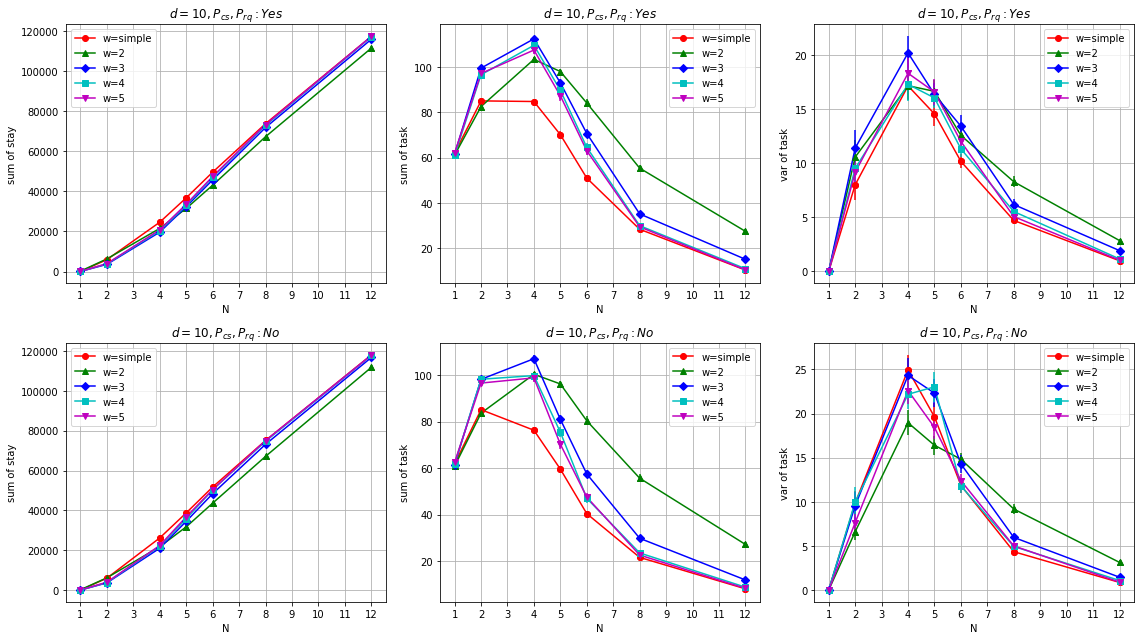

In [169]:
MAX_NUM_NODES = 12
NUM_TYPE_NUM_NODES = 7 # 1, 2, 4, 5, 6, 8, 12 -> 7 types
WINDOW_SIZES = ['simple', '2', '3', '4', '5'] # redefined below
NUM_WINDOW_SIZE = 5 # redefined below

COLORS = ["r", "g", "b", "c", "m", "y", "k", "w"]
MARKERS = ['o', '^', 'D', 's', 'v', '*']

plt.figure(figsize=(16, 9))

def data_plot(xdata, ydata, errdata, title, ylabel, xlabel='N'):
    """
    Plot graph with xdata and ydata.
    The second param errdata represents yerror.
    """
    for i in range(NUM_WINDOW_SIZE):
        x = xdata[NUM_TYPE_NUM_NODES*i:NUM_TYPE_NUM_NODES*(i+1)]
        y = ydata[NUM_TYPE_NUM_NODES*i:NUM_TYPE_NUM_NODES*(i+1)]
        err = errdata[NUM_TYPE_NUM_NODES*i:NUM_TYPE_NUM_NODES*(i+1)]
        plt.errorbar(x, y, yerr=err, fmt=COLORS[i]+MARKERS[i], ecolor=COLORS[i])
        plt.plot(x, y, marker=MARKERS[i], color=COLORS[i], label='w='+WINDOW_SIZES[i])
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(1, MAX_NUM_NODES+1, 1.0))
    plt.grid()
    plt.legend()

plt.subplot(2, 3, 1)
data_plot(num_nodes, ave_sum_stay_t, se_sum_stay_t, '$d=10, P_{cs}, P_{rq}: Yes$', 'sum of stay')

plt.subplot(2, 3, 2)
data_plot(num_nodes, ave_sum_task_t, se_sum_task_t, '$d=10, P_{cs}, P_{rq}: Yes$', 'sum of task')

plt.subplot(2, 3, 3)
data_plot(num_nodes, ave_var_task_t, se_var_task_t, '$d=10, P_{cs}, P_{rq}: Yes$',  'var of task')

plt.subplot(2, 3, 4)
data_plot(num_nodes, ave_sum_stay_f, se_sum_stay_f, '$d=10, P_{cs}, P_{rq}: No$',  'sum of stay')

plt.subplot(2, 3, 5)
data_plot(num_nodes, ave_sum_task_f, se_sum_task_f, '$d=10, P_{cs}, P_{rq}: No$',  'sum of task')

plt.subplot(2, 3, 6)
data_plot(num_nodes, ave_var_task_f, se_var_task_f, '$d=10, P_{cs}, P_{rq}: No$',  'var of task')

plt.tight_layout()

[0.9971033150949469, 0.6855624446412755, 0.34117315965102724, 0.2260090841735657, 0.137143472757144, 0.056707549631651845, 0.013679486145824935, 0.9835854522046991, 0.6652709557935422, 0.416274675350782, 0.3161421254389073, 0.22674997980015618, 0.11106650340245297, 0.03672498589051036, 0.9903443836498229, 0.8025605926403092, 0.45278012302496684, 0.2999710079567052, 0.19036332785693125, 0.0703575084810406, 0.020075788115778443, 0.9834245252655295, 0.7788871889846204, 0.44132191532987575, 0.2893405920819508, 0.17379945595087398, 0.05989923118614127, 0.014458867478298262, 0.9988735114258127, 0.7833964087285611, 0.43287902544928236, 0.28160938053667495, 0.16973255406824853, 0.05887548427243711, 0.013773549410088957]


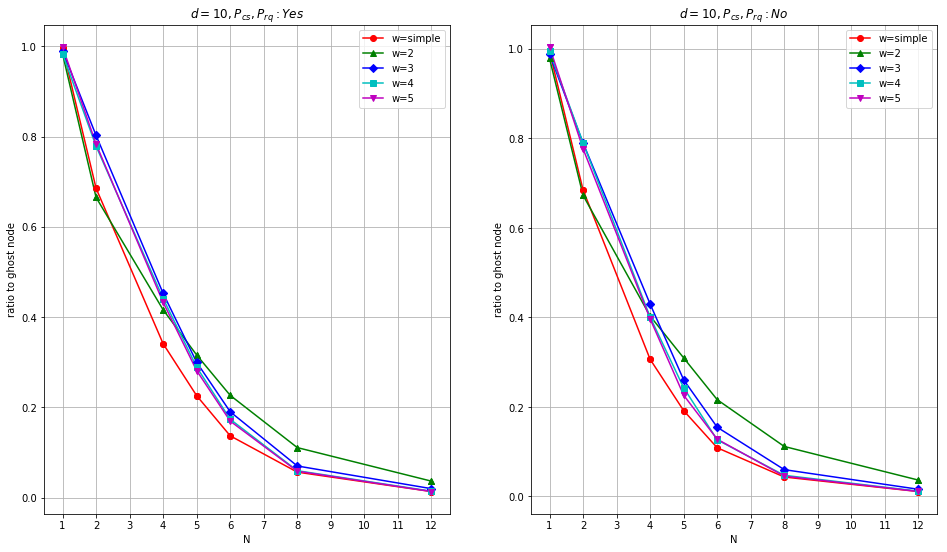

In [183]:
ratio_t = []
ratio_f= []
for i in range(NUM_WINDOW_SIZE):
    for j in range(NUM_TYPE_NUM_NODES):
        window_task_t = ave_sum_task_t[NUM_TYPE_NUM_NODES*i+j]
        window_task_f = ave_sum_task_f[NUM_TYPE_NUM_NODES*i+j]
        ghost_task = ave_sum_task_g[j]
        ratio_t.append(window_task_t/ghost_task)
        ratio_f.append(window_task_f/ghost_task)

plt.figure(figsize=(16, 9))
print(ratio_t)
dummy_se = np.zeros(35)
plt.subplot(1, 2, 1)
data_plot(num_nodes, ratio_t, dummy_se, '$d=10, P_{cs}, P_{rq}: Yes$', 'ratio to ghost node')
plt.subplot(1, 2, 2)
data_plot(num_nodes, ratio_f, dummy_se, '$d=10, P_{cs}, P_{rq}: No$', 'ratio to ghost node')

[2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5.
 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6.]
[21404.14 20029.11 20256.91 20969.96 20956.44 22368.28 19838.88 20175.03
 20241.85 20302.62 26025.95 23059.99 23571.22 23183.08 23738.61 28307.09
 25514.02 25816.24 26231.39 25816.29 30182.46 28460.34 28217.48 28933.67
 28251.17 31323.51 29610.83 29385.26 29669.86 29794.55 32831.98 31200.31
 30605.27 31161.51 31060.87 33995.92 32554.26 32169.65 32081.04 32133.98
 34336.14 33099.44 32867.97 32505.46 32785.02]
[[21404.14, 22368.28, 26025.95, 28307.09, 30182.46, 31323.51, 32831.98, 33995.92, 34336.14], [20029.11, 19838.88, 23059.99, 25514.02, 28460.34, 29610.83, 31200.31, 32554.26, 33099.44], [20256.91, 20175.03, 23571.22, 25816.24, 28217.48, 29385.26, 30605.27, 32169.65, 32867.97], [20969.96, 20241.85, 23183.08, 26231.39, 28933.67, 29669.86, 31161.51, 32081.04, 32505.46], [20956.44, 20302.62, 23738.61, 25816.29, 28251.17, 29794.55, 31060.87, 32133.98, 

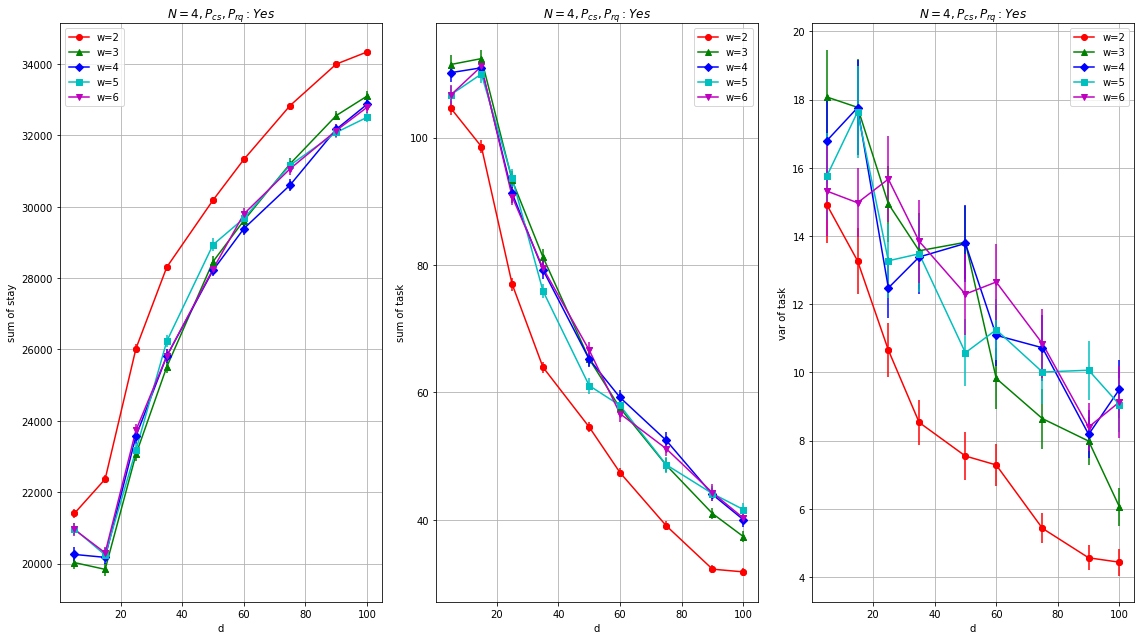

In [221]:
NUM_WINDOW_SIZE = 5 # redefined
WINDOW_SIZES = ['2', '3', '4', '5', '6'] # redefined
NUM_TYPE_DELAYS = 9 # 5, 15, 25, 35, 50, 60, 75, 90, 100
MAX_DELAY = 100
DELAYS = [5, 15, 25, 35, 50, 60, 75, 90, 100]
priority_d, window_d, num_nodes_d, ave_sum_stay_d, se_sum_stay_d, ave_sum_task_d, se_sum_task_d, ave_var_task_d, se_var_task_d = np.loadtxt("./data/delay/data_summary", delimiter=',', unpack=True)
print(window_d)
print(ave_sum_stay_d)

def parse_wx_to_dx(data):
    parsed = [[] for i in range(NUM_WINDOW_SIZE)]
    for i in range(NUM_TYPE_DELAYS):
        for j in range(NUM_WINDOW_SIZE):
            parsed[j].append(data[NUM_WINDOW_SIZE*i+j])
    return parsed

print(parse_wx_to_dx(ave_sum_stay_d))

def data_plot_d(xdata, ydata, errdata, title, ylabel, xlabel='d'):
    """
    Plot graph with xdata and ydata.
    The second param errdata represents yerror.
    """
    for i in range(NUM_WINDOW_SIZE):
        x = xdata
        y = ydata[i]
        err = errdata[i]
        plt.errorbar(x, y, yerr=err, fmt=COLORS[i]+MARKERS[i], ecolor=COLORS[i])
        plt.plot(x, y, marker=MARKERS[i], color=COLORS[i], label='w='+WINDOW_SIZES[i])
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.legend()
    
plt.figure(figsize=(16, 9))
plt.subplot(1, 3, 1)
data_plot_d(DELAYS, parse_wx_to_dx(ave_sum_stay_d), parse_wx_to_dx(se_sum_stay_d), '$N = 4, P_{cs}, P_{rq}: Yes$', 'sum of stay')
plt.subplot(1, 3, 2)
data_plot_d(DELAYS, parse_wx_to_dx(ave_sum_task_d), parse_wx_to_dx(se_sum_task_d), '$N = 4, P_{cs}, P_{rq}: Yes$', 'sum of task')
plt.subplot(1, 3, 3)
data_plot_d(DELAYS, parse_wx_to_dx(ave_var_task_d), parse_wx_to_dx(se_var_task_d), '$N = 4, P_{cs}, P_{rq}: Yes$', 'var of task')
plt.tight_layout()